<a href="https://colab.research.google.com/github/ChepChaf/DH-DL/blob/master/Martin_TP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import datetime
from datetime import date
from datetime import datetime

### Descripcion Basica del data set
De las variables, se hara lo siguiente:
*   comments              No para predecir, por conformarse luego de ser subida la charla
*   description           hacer un analisis de texto
*   duration              Incluir en modelo
*   event                 Generar buckets para incluir en *   modelo
*   film_date             no se entiende como serviria al *   predecir. Tomar aging de published date. 
*   languages             Incluir en modelo
*   main_speaker          Analizar
*   name                  Remover: se repite speaker y title
*   num_speaker           Analizar si impacta
*   published_date        Ver alguna variable como Aging
*   ratings               Chequear si estara al predecir
*   related_talks         Analizar si puede haber algo 
*   relevante en el texto, o si el estar asociado a charlas populares la hace popular
*   speaker_occupation    Analizar si impacta
*   tags                  Hacer un analisis de obtener topicos
*   title                 Ver si un analisis de texto puede sacar algo util
*   url                   A priori no considerar
*   views                 Variable dependiente

In [44]:
data = pd.read_csv('ted_main.csv')   #leo del archivo subido localmente en colab
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [46]:
data.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


#Explorar el dataset

###Explorando Languages:

- Languages tiene correlacion positiva con Views

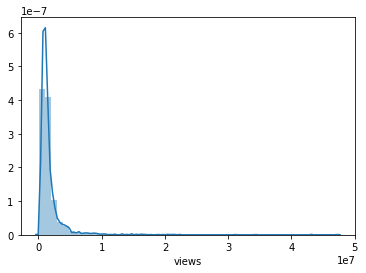

In [47]:
#ver views
sns.distplot(data['views'])

In [48]:
data['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [0]:
col = data['views']

In [0]:
col = np.log(col)

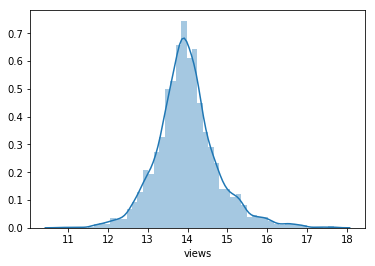

In [51]:
sns.distplot(col)

In [52]:
# create a new column of log of views

data['views_log'] = np.log(data['views'])
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824


Text(0.5, 0, 'Number of Languages')

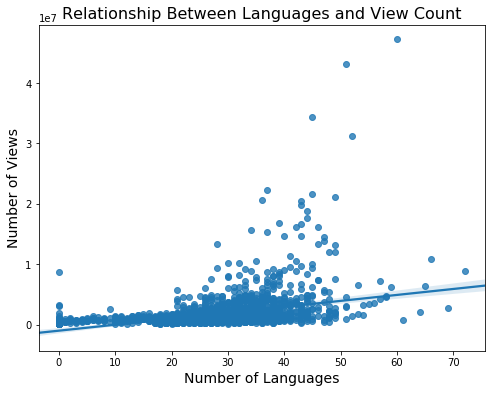

In [53]:
#Languages vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='languages',y='views')
plt.title("Relationship Between Languages and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


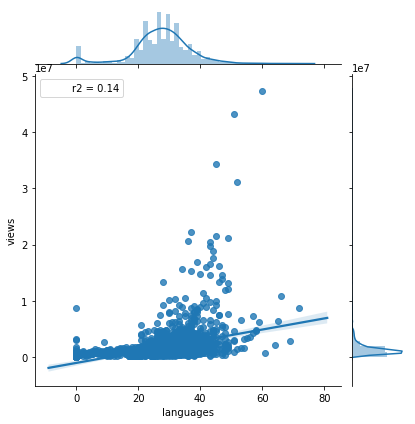

In [54]:
#from scipy import stats
x=data['languages']
y=data['views']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


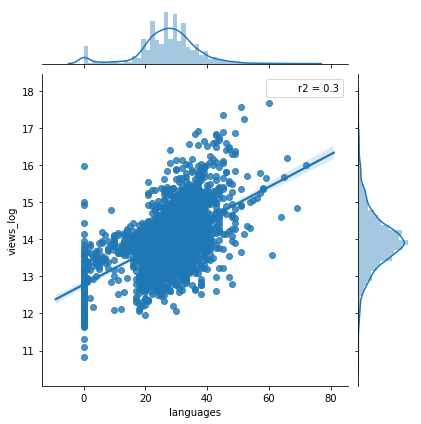

In [55]:
x=data['languages']
y=data['views_log']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

Text(0.5, 0, 'Number of Languages')

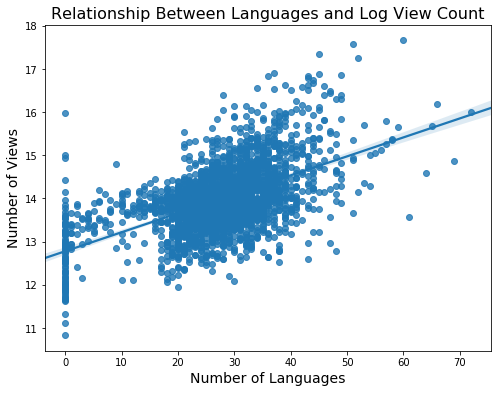

In [56]:
#Languages vs. log of View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='languages',y='views_log')
plt.title("Relationship Between Languages and Log View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

### Explorando comments

*   Si bien tiene relacion, no deberia ser considerado para predecir en el futuro por no contar con el dato de la variable al momento de publicacion



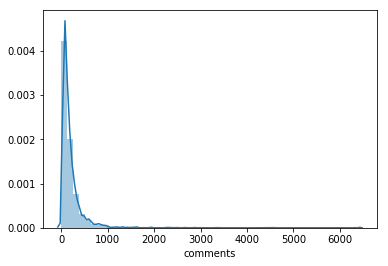

In [57]:
#ver comments
sns.distplot(data['comments'])

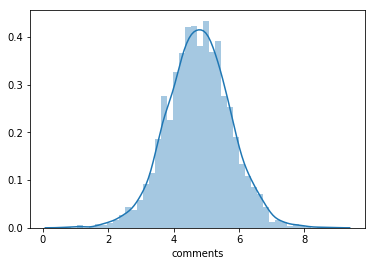

In [58]:
# pruebo con el logaritmo --> parece tener pocos valores "extremos"
col = data['comments']
col = np.log(col)
sns.distplot(col)

In [59]:
data['comments'].describe()   #se verifica lo que se en el chart. media 191, desvio 282 ... y valores max de 6k

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

Text(0.5, 0, 'Number of Languages')

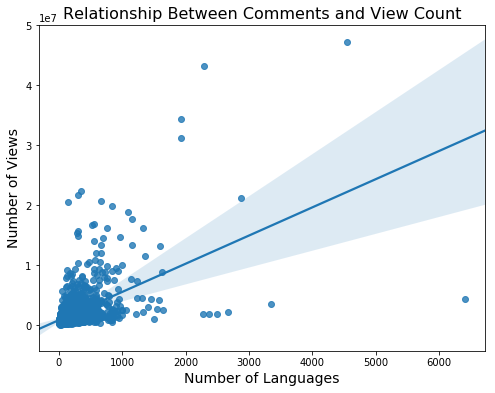

In [60]:
#Comments vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='comments',y='views')
plt.title("Relationship Between Comments and View Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

In [61]:
# create a new column of log of comments

data['comments_log'] = np.log(data['comments'])
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730


Text(0.5, 0, 'Number of Languages')

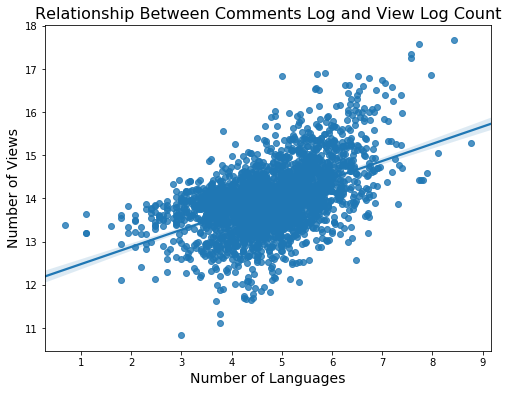

In [62]:
#Log de:   Comments vs. View Count
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=data,x='comments_log',y='views_log')
plt.title("Relationship Between Comments Log and View Log Count", fontsize = 16)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Number of Languages", fontsize = 14)

### Explorando Published date

*   Semana vs Fin_De_Semana corta views

Nota:A Unix timestamp is the number of seconds between a particular date and January 1, 1970 at UTC. 

In [0]:
#import datetime

In [64]:
# creamos nueva variable con otro formato de dia publicado

data['published_date_read'] = pd.to_datetime(data['published_date'],unit='s')
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00


In [65]:
#agregamos una variable con el dia de la semana de publicacion
data['published_wkday'] = pd.to_datetime(data['published_date'],unit='s').dt.dayofweek
data.head(2) 
# Verificando: el June 27, 2006 fue martes

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1


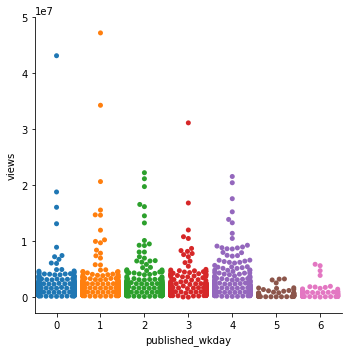

In [66]:
sns.catplot(x='published_wkday', y='views', data=data, kind="swarm")

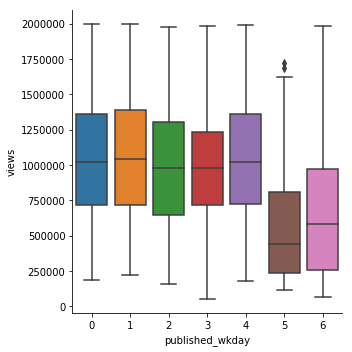

In [67]:
sns.catplot(x="published_wkday", y="views", kind="box", data=data.query("views < 2000000"))  #si tomamos menos de 2 millones de views

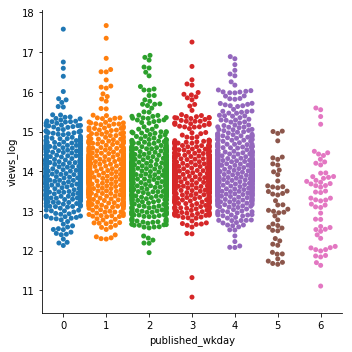

In [68]:
sns.catplot(x='published_wkday', y='views_log', data=data, kind="swarm")

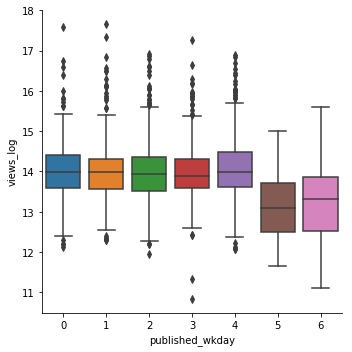

In [69]:
sns.catplot(x="published_wkday", y="views_log", kind="box", data=data) 

###Explorando Cantidad de dias online ("Aging"):

- Cantidad de dias online tiene correlacion positiva con Views // era lo q esperaba pero no me da eso -->hay q revisar codigo, muchas conversiones de fechas que quizas hice mal

NOTAS: 
-El data set es hasta septiembre 21 2017

In [70]:
#recuerdo la estructura del dataset
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1


In [71]:
#chequeo el data type del feature de published_date_read
type(data['published_date_read'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [72]:
# create a new column of log of views


# creo una lista convirtiendo del formato timestamp a datetim
published_date_Age = []
for i in range(2550):
  dummy = datetime.date(data['published_date_read'][i])
  published_date_Age.append(dummy)
  
#agrego columna al dataset
data['published_date_Age'] = published_date_Age
data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1,2006-06-27
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1,2006-06-27


In [73]:
#fijamos la fecha de creacion del dataset

import datetime
DataSet_date = datetime.date(2017, 9, 23)
DataSet_date

datetime.date(2017, 9, 23)

In [74]:
#calculamos la edad del dataset
data['published_date_Age'] = DataSet_date - data['published_date_Age'] 
data.tail(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,12.946363,3.465736,2017-09-21 20:00:42,3,2 days
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,12.878305,2.079442,2017-09-22 15:00:22,4,1 days


In [0]:
#convierto los dias a numero
data['published_date_Age'] = pd.to_timedelta(data.published_date_Age, errors='coerce').dt.days


In [76]:
#chequeo tipo de dato
type(data['published_date_Age'][0])

numpy.int64

In [77]:
data.tail(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,12.946363,3.465736,2017-09-21 20:00:42,3,2
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,12.878305,2.079442,2017-09-22 15:00:22,4,1


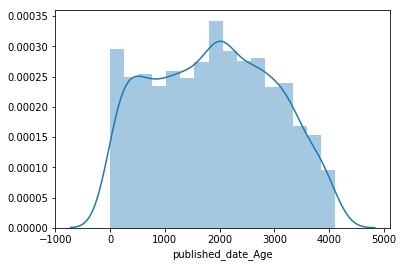

In [78]:
#ver aging de publicacioj
sns.distplot(data['published_date_Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


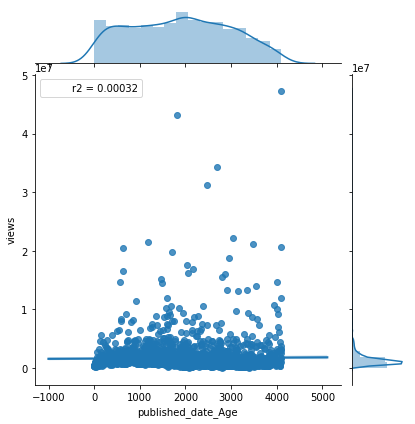

In [79]:
#ver aging con views

x=data['published_date_Age']
y=data['views']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


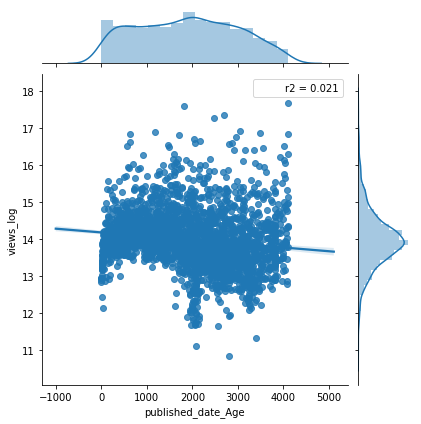

In [80]:
#ver aging con log de views
x=data['published_date_Age']
y=data['views_log']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

### Explorando Events


*   Creando buckets de Events, se observa una relacion con views


In [81]:
# ver los eventos que hay
data['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'Justice with Michael Sandel',
       'Business Innovation Factory', 'TEDxTC',
       'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 

In [85]:
data['event'].value_counts()

TED2014                          84
TED2009                          83
TED2016                          77
TED2013                          77
TED2015                          75
TEDGlobal 2012                   70
TED2011                          70
TED2007                          68
TEDGlobal 2011                   68
TED2010                          68
TED2017                          67
TEDGlobal 2013                   66
TEDGlobal 2009                   65
TED2012                          65
TED2008                          57
TEDGlobal 2010                   55
TEDGlobal 2014                   51
TED2006                          45
TED2005                          37
TEDIndia 2009                    35
TEDSummit                        34
TEDWomen 2010                    34
TED2003                          34
TED2004                          31
TED2002                          28
TEDWomen 2015                    28
TEDGlobal 2007                   27
TEDGlobal 2005              

In [0]:
# Tantos eventos "unicos" no nos servira para predecir, agrupamos por tipo de event
"""
the following types of TED gatherings are common:

Yearly TED Conferences: TED's main event. A five-day conference about Technology, Entertainment and Design -- as well as science, business, the arts and the global issues facing our world
TEDx: Independent and locally hosted TED events
TEDGlobal: An annual five-day conference that celebrates human ingenuity by exploring ideas, innovation and creativity from all around the world
TEDWomen: A three-day conference about the power of women and girls to be creators and change-makers
TEDSalon: Small weekly or monthly events that keeps a TEDx community engaged between regular TEDx events
TEDNYC: TED events hosted in NYC
"""

#Create column with default value of "Other"
data['event_class'] = 'Other'

In [0]:
#Loop over every talk and assign event category based on name of event
for ii in range(len(data)):
    if data['event'][ii].count('TED20') >0:
        data['event_class'][ii] = 'Yearly TED Conference'
    elif data['event'][ii].count('TED19') >0:
        data['event_class'][ii] = 'Yearly TED Conference'
    elif data['event'][ii].count('TEDx') >0:
        data['event_class'][ii] = 'TEDx'
    elif data['event'][ii].count('TEDGlobal') >0:
        data['event_class'][ii] = 'TEDGlobal'
    elif data['event'][ii].count('TEDWomen') >0:
        data['event_class'][ii] = 'TEDWomen'
    if data['event'][ii].count('TEDSalon') >0:
        data['event_class'][ii] = 'TEDSalon'
    if data['event'][ii].count('TEDNYC') >0:
        data['event_class'][ii] = 'TEDNYC'
    else:
        pass

In [89]:
# verifico las categorias  ---> antes de pasar al modelo hay que sacar event y dejar event_class
data['event_class'].value_counts()

Yearly TED Conference    978
TEDx                     471
TEDGlobal                464
Other                    443
TEDWomen                  96
TEDSalon                  79
TEDNYC                    19
Name: event_class, dtype: int64

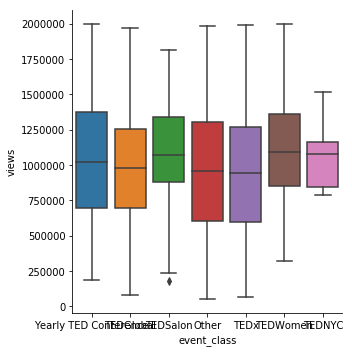

In [90]:
# visualizamos la variable con views<2M
sns.catplot(x="event_class", y="views", kind="box", data=data.query("views < 2000000"))  #si tomamos menos de 2 millones de views

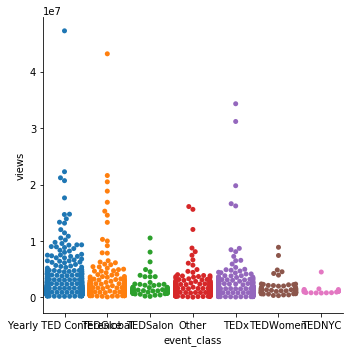

In [93]:
# visualizamos la variable con views (sin restriccion de cantidades)
sns.catplot(x='event_class', y='views', data=data, kind="swarm")

Text(0.5, 0, 'Event Class')

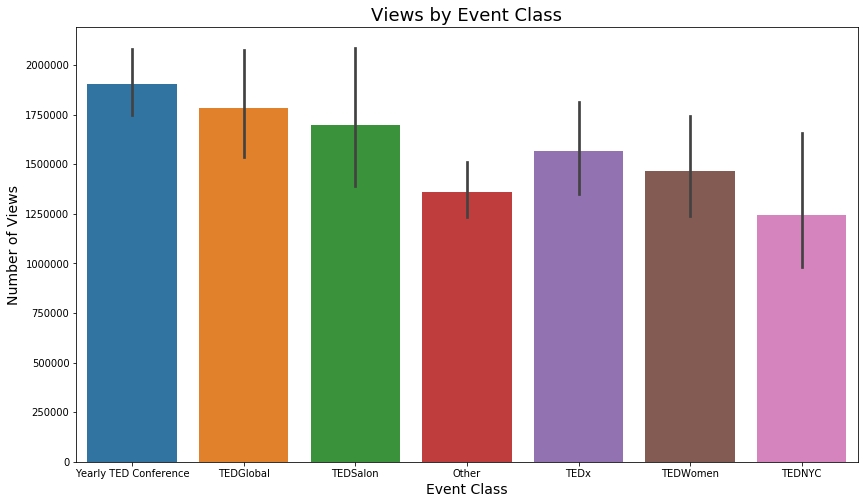

In [94]:
#otra forma de visualizarlo
#View Count by Event Class
f, ax = plt.subplots(figsize = (14,8))
sns.barplot(data=data,x='event_class',y='views')
plt.title("Views by Event Class", fontsize = 18)
plt.ylabel("Number of Views", fontsize = 14)
plt.xlabel("Event Class", fontsize = 14)

### Explorando duration


*   no pareciera haber una relacion fuerte



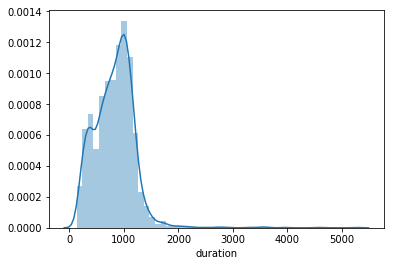

In [95]:
#ver 
sns.distplot(data['duration'])

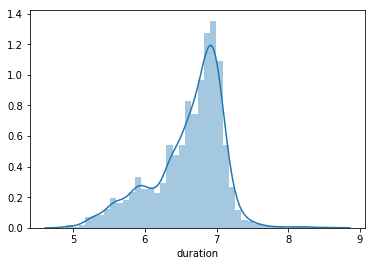

In [96]:
#ver log
col = data['duration']
col = np.log(col)
sns.distplot(col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


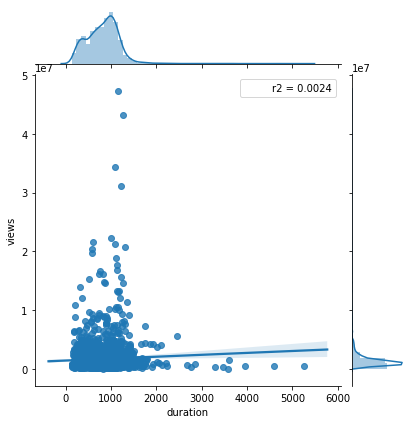

In [98]:
# ver relacion con views
x=data['duration']
y=data['views']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)

In [99]:
# create a new column of log of duration

data['duration_log'] = np.log(data['duration'])
data.head(2) 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,views_log,comments_log,published_date_read,published_wkday,published_date_Age,event_class,duration_log
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,17.670479,8.423542,2006-06-27 00:11:00,1,4106,Yearly TED Conference,7.059618
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,14.978824,5.579730,2006-06-27 00:11:00,1,4106,Yearly TED Conference,6.884487


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


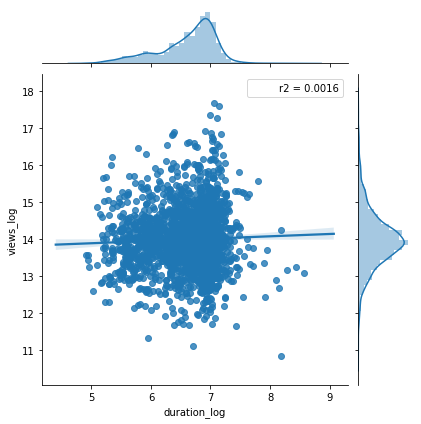

In [100]:
# ver relacion con views, ambos log
x=data['duration_log']
y=data['views_log']
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)